In [2]:
import sys

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

if "/home/axel/Studier/BdG-numerical/methods" not in sys.path:
    sys.path.append("/home/axel/BdG-numerical/methods")
    
from bdg_method import BdG_method
from modified_bdg_method import MBdG_method

from utils import (
    calculate_critical_temperature, 
    find_critical_temperature
)

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
N = 20
Nc = 2
t = 1
mu = 0.5 * t
T = 0.2

num_iter = 2000
solver = MBdG_method(N, Nc, mu, t, T, num_iter)

solver.run_solver()
print("done.")

done.


(-1.0, 1.0)

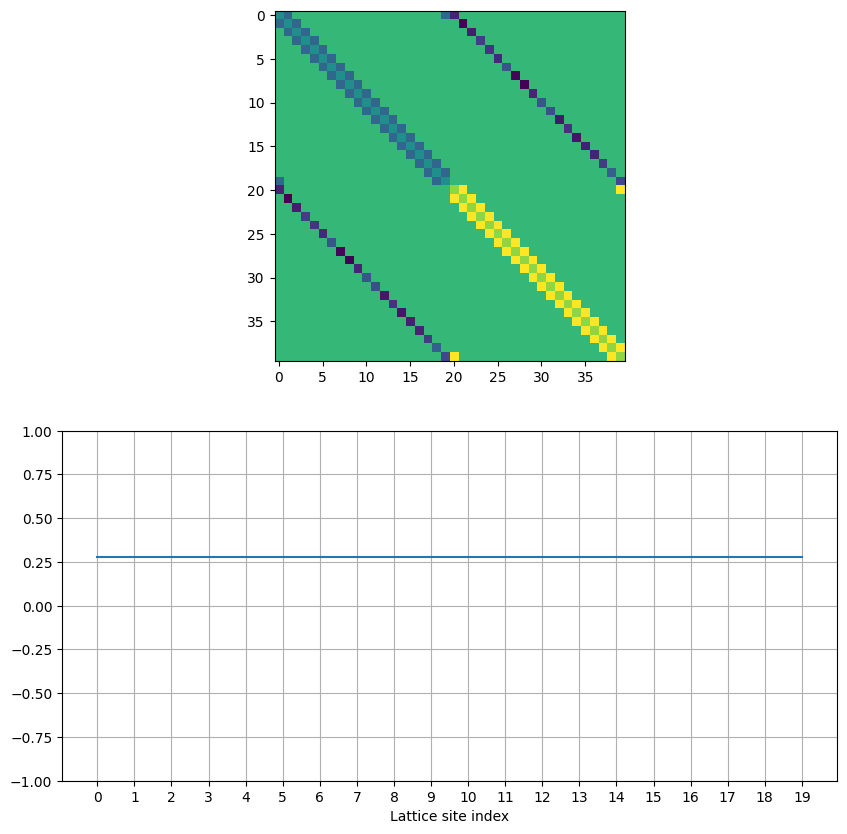

In [15]:
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].imshow(np.real(solver.H_bdg))
delta_diag = np.diagonal(solver.delta)

axs[1].plot(np.real(delta_diag))
axs[1].grid()
axs[1].set_xticks([i for i in range(N)])
axs[1].set_xlabel("Lattice site index")
axs[1].set_ylim(-1, 1)

8.659739592076221e-16


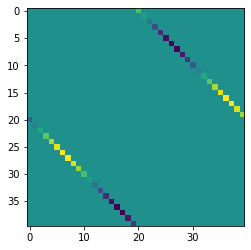

In [37]:
print(np.mean(np.imag(delta_diag)))
plt.imshow(np.imag(solver.H_bdg))

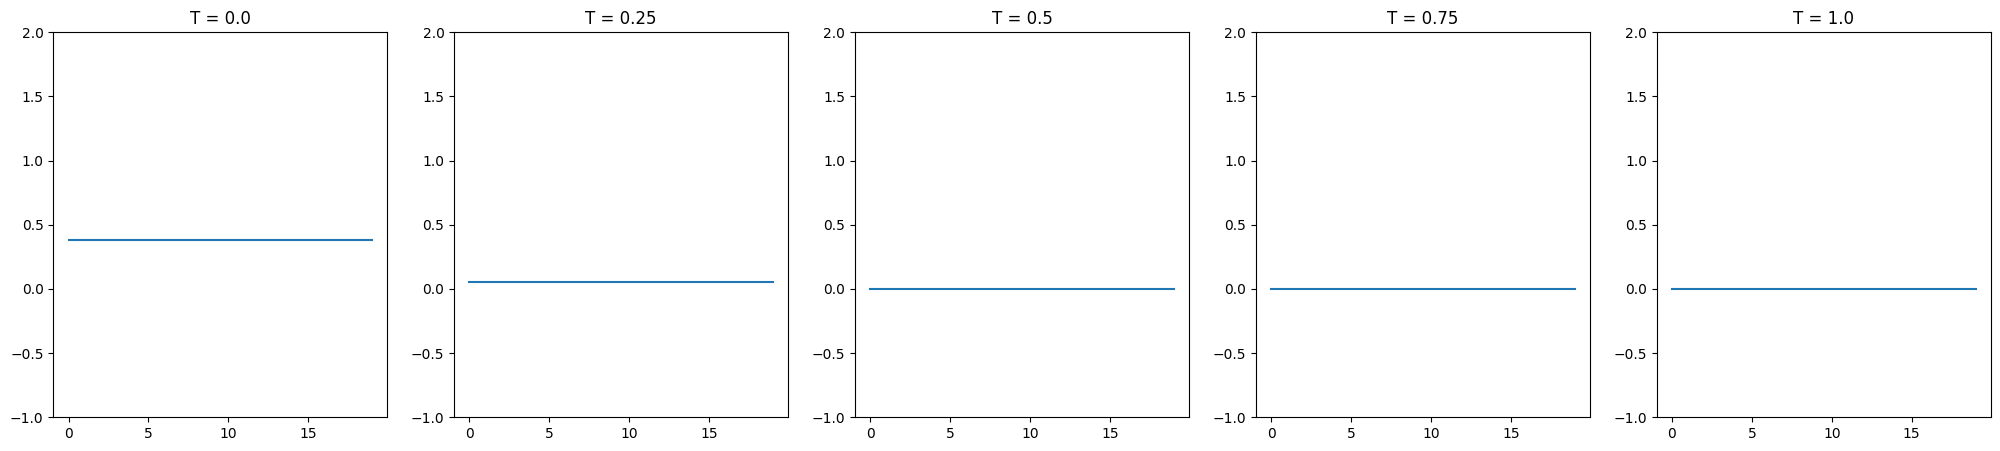

In [23]:
N = 20
Nc = 2
t = 1
mu = 0.5 * t

T_set = np.linspace(0, 1, 5)
num_iter = 100

fig, axs = plt.subplots(1,len(T_set), figsize=(25,5))
last_delta = np.zeros((N,N))

# Creating a BdG instance
for i, T in enumerate(T_set):
    if not np.any(last_delta):
        solver = MBdG_method(N, Nc, mu, t, T, num_iter)
    else:
        solver = MBdG_method(N, Nc, mu, t, T, num_iter, delta=last_delta)
    last_delta = solver.run_solver()
    
    delta_diag = np.diagonal(solver.delta)
    axs[i].plot(np.real(delta_diag))
        
    axs[i].set_title("T = {0}".format(round(T, 3)))
    axs[i].set_ylim(-1, 2)

T = 0.04 T = 0.04 T = 0.04 T = 0.05 T = 0.05 T = 0.05 T = 0.05 T = 0.06 T = 0.06 T = 0.06 

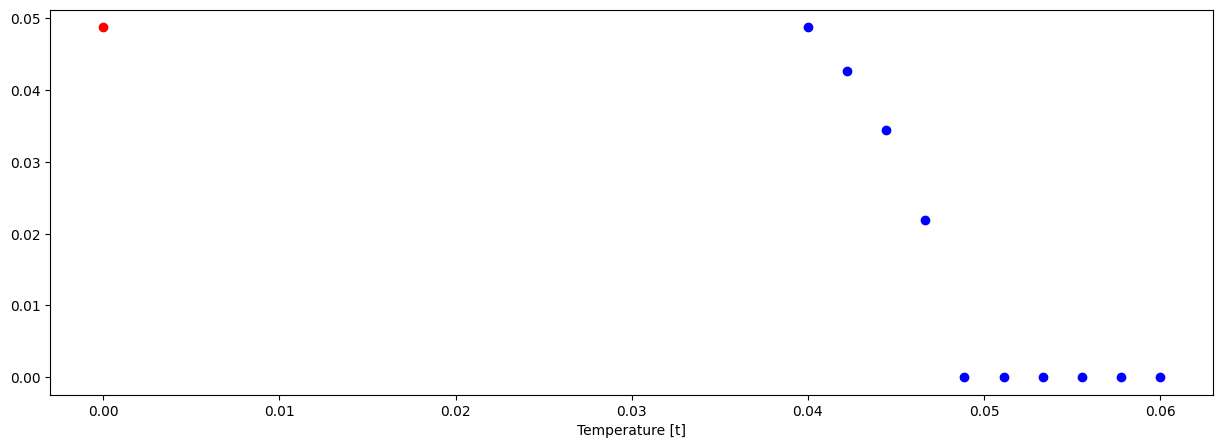

In [6]:
# Calculating the gap parameter amplitude
N = 40
Nc = 2
t = 1

mu = 0.5 * t
V = 1.4 * t

convergence_threshold = 1e-7

T_set = np.linspace(0.04, 0.06, 10)

fig, axs = plt.subplots(1, 1, figsize=(15,5))

deltas = []

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    print("T = {0}".format(round(T, 2)), end=" ")
    solver.set_temperature(T)
    solver.run_solver()
    deltas.append(solver.get_global_delta())
        
axs.scatter(T_set, deltas, c="b")    
axs.set_xlabel("Temperature [t]")
    
axs.scatter(0, deltas[0], c="red")



In [5]:
Tc = calculate_critical_temperature(deltas[0])
Tc_num = find_critical_temperature(T_set, deltas)

print(Tc, Tc_num)

0.039023524996909226 0.048275862068965524


0.1K


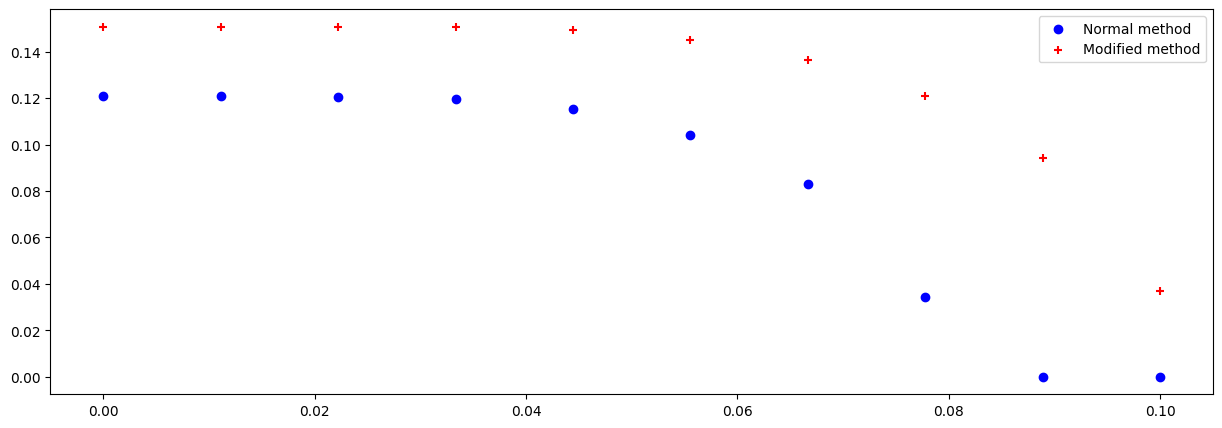

In [26]:
N = 20
Nc = 3
t = 1

mu = 1 * t
V = 1.5 * t

convergence_threshold = 1e-7

T_set = np.linspace(0, 0.1, 10)

# Calculating the gap parameter amplitude
fig, axs = plt.subplots(1, figsize=(15,5))

# Creating a BdG instance
solver = BdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    print(round(T, 2), end='\x1b[1K\r')
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, solver.get_global_delta(), color="blue", label="Normal method")    
    else:
        axs.scatter(T, solver.get_global_delta(), color="blue")    

print("")


# Creating a BdG instance
solver = MBdG_method(N, Nc, mu, t, V, T_set[0], convergence_threshold)
for i, T in enumerate(T_set):
    print(round(T, 2), end='\x1b[1K\r')
    solver.set_temperature(T)
    last_delta = solver.run_solver()
    if i == 0:
        axs.scatter(T, solver.get_global_delta(), color="red", marker="+", label="Modified method")    
    else:
        axs.scatter(T, solver.get_global_delta(), color="red", marker="+")    
    
axs.legend()

# Comparing the two methods.

# Seeing how it depends on $N_c$

In [ ]:
N = 30
Nc_list = [1, 2, 3]
t = 1

#mu = 0.8 * t
V = 1.5 * t

T_set = np.linspace(0, 0.3, 30)

signs = ["+", "o", "x"]

convergence_threshold = 1e-7
t = 1

mu_list = np.array([0, 0.1, 0.3, 0.5, 0.8, 1, 1.5, 2, 3]) * t

run_history = {}

for mu in mu_list:
    solvers = [
        BdG_method(N, 0, mu, t, V, T_set[0], convergence_threshold),
        MBdG_method(N, Nc_list[0], mu, t, V, T_set[0], convergence_threshold), 
        MBdG_method(N, Nc_list[1], mu, t, V, T_set[1], convergence_threshold), 
        MBdG_method(N, Nc_list[2], mu, t, V, T_set[2], convergence_threshold)
    ]
    
    run_history[mu] = [
        [], [], [], []
    ]

    # Calculating the gap parameter amplitude
    fig, axs = plt.subplots(1, figsize=(7,5))
    axs.grid()

    for i, T in enumerate(T_set):
        print(round(T, 2), end=" ")
        for i, solver in enumerate(solvers):
            solver.set_temperature(T)
            solver.run_solver()
            run_history[mu][i].append(solver.get_global_delta())

In [ ]:
for mu in mu_list:

    axs.plot(T_set, run_history[mu][0], c="b", label="Normal method")  
    for i in range(3):
        axs.scatter(T_set, run_history[mu][i+1], c="r", marker=signs[i], label="Modified method, Nc {0}".format(i+1))

    size = 14
    axs.set_ylabel(f"Gap parameter $\Delta [t]$", fontname="monospace", fontsize=size)
    axs.set_xlabel(f"Temperature [t]", fontname="monospace",fontsize=size)

    axs.set_title(f"$\mu$ = {mu}")

    axs.set_axisbelow(True)
    axs.legend()

#fig.savefig("../report/figures/deltacomp_N{0}_mu{1}.eps".format(N, mu), format="eps")
    
# fig.show()